<a href="https://colab.research.google.com/github/isaiascabreraa/TP1-OrganizacionDeDatos/blob/main/BARPLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
infoplay = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore.csv")
inforeviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TP1-VISU/googleplaystore_user_reviews.csv")

In [ ]:
infoplay

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
bargraphic = infoplay[['Genres','Type','Installs']]

In [ ]:
bargraphic['Type'] = bargraphic['Type'].str.replace('0','Free')
bargraphic = bargraphic.dropna(subset=['Type'])

<ipython-input-5-9e2a357d6626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bargraphic['Type'] = bargraphic['Type'].str.replace('0','Free')


In [ ]:
bargraphic['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
bargraphic['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', 'Free'], dtype=object)

In [ ]:
bargraphic['Installs'] = bargraphic['Installs'].str.replace('+','')

<ipython-input-8-41adf718aae0>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bargraphic['Installs'] = bargraphic['Installs'].str.replace('+','')


In [ ]:
bargraphic["Installs"] = pd.to_numeric(bargraphic["Installs"], errors='coerce')
bargraphic = bargraphic.dropna(subset='Installs')

In [ ]:
bargraphic['Installs'].describe()

count    1803.000000
mean      139.482529
std       174.966580
min         0.000000
25%        10.000000
50%       100.000000
75%       100.000000
max       500.000000
Name: Installs, dtype: float64

In [ ]:
bargraphic = bargraphic.dropna(subset=['Genres'])
bargraphic["Genres"] = bargraphic["Genres"].map(lambda x: [ string.strip() for string in x.split(";")])

In [ ]:
apps_gratuitas = bargraphic[bargraphic['Type'] == 'Free']
apps_pagas = bargraphic[bargraphic['Type'] == 'Paid']

apps_gratuitas = apps_gratuitas.explode('Genres')
apps_pagas = apps_pagas.explode('Genres')

In [ ]:
grupo_genero_gratuitas = apps_gratuitas.groupby('Genres')['Installs'].sum().reset_index()
grupo_genero_pagas = apps_pagas.groupby('Genres')['Installs'].sum().reset_index()

grupo_genero_gratuitas = grupo_genero_gratuitas.sort_values(by='Installs', ascending=False)
grupo_genero_pagas = grupo_genero_pagas.sort_values(by='Installs', ascending=False)

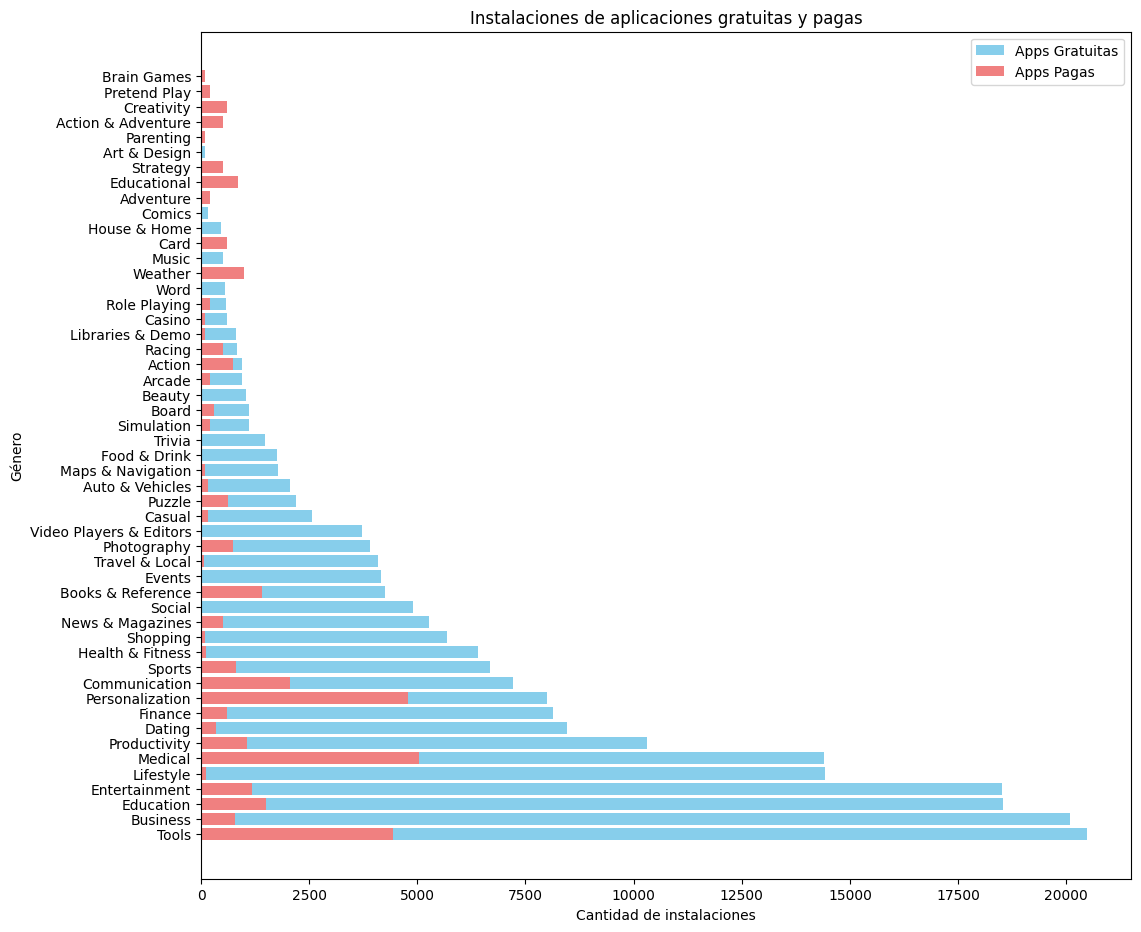

In [ ]:
plt.figure(figsize=(12, 11))
num_generos_a_mostrar = len(bargraphic["Genres"])
generos_top_gratuitas = grupo_genero_gratuitas.head(num_generos_a_mostrar)
plt.barh(generos_top_gratuitas['Genres'], generos_top_gratuitas['Installs'], color='skyblue', label='Apps Gratuitas')

generos_top_pagas = grupo_genero_pagas.head(num_generos_a_mostrar)
plt.barh(generos_top_pagas['Genres'], generos_top_pagas['Installs'], color='lightcoral', label='Apps Pagas')

plt.xlabel('Cantidad de instalaciones')
plt.ylabel('Género')
plt.title('Instalaciones de aplicaciones gratuitas y pagas')
plt.legend()

plt.show()